In [209]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np


In [210]:
# Definimos el ambiente
rows = 10
columns = 2
q_values = np.zeros((rows, columns, 4))

In [211]:
# Definimos las acciones que se pueden tomar
actions = ["up", "down", "right", "left"]

In [212]:
# Recompensas
rewards = np.full((rows, columns), -1)
rewards[rows-1,0] = 100
def get_initial_rewards():
    global rewards
    rewards = np.full((rows, columns), -1)
    rewards[rows-1,0] = 100


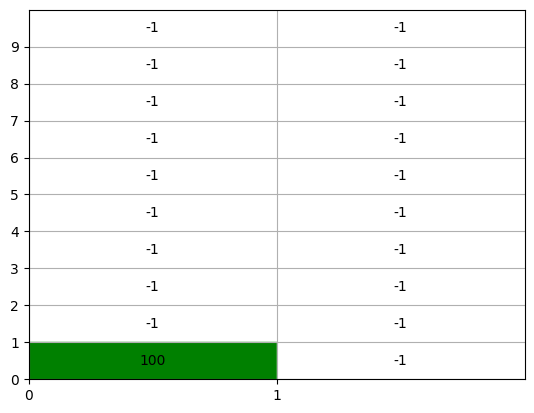

In [213]:
# Create a figure and a grid of subplots
fig, ax = plt.subplots()

# Define colors for different rewards
color_dict = {-1: 'white', -100: 'black', 100: 'green'}

# Loop over data dimensions and create text annotations
for i in range(rows):
    for j in range(columns):
        reward_value = rewards[i, j]
        color = color_dict.get(reward_value, 'grey')  # Default color if a new reward value is encountered
        rect = plt.Rectangle((j, rows - i - 1), 1, 1, color=color)
        ax.add_patch(rect)
        # Optionally add text annotations
        text = ax.text(j + 0.5, rows - i - 0.5, int(reward_value), ha="center", va="center", color="black")

# Set the grid size
ax.set_xlim(0, columns)
ax.set_ylim(0, rows)
ax.set_xticks(np.arange(0, columns, 1))
ax.set_yticks(np.arange(0, rows, 1))
ax.grid(which='both')

plt.show()


In [214]:
# Funcion para determinar si es un estado terminal (solo cuenta las caidas)
def is_terminal_state(current_row_index, current_column_index):
  if current_column_index > columns - 1 or current_column_index < 0:
    return True
  if current_row_index > rows - 1 or current_row_index < 0:
    True

  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

# Obtener una posicion inicial randomizada 
def get_starting_location():
  current_row_index = np.random.randint(rows)
  current_column_index = np.random.randint(columns)

  # garantizar que es una posicion valida
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(rows)
    current_column_index = np.random.randint(columns)
  return current_row_index, current_column_index

# Funcion para obtener la siguiente accion
# Utiliza un algoritmo Epsilon-Greedy
def get_next_action(current_row_index, current_column_index, epsilon):
  # Si un numero random es mayor o igual a epsilon greedy, obtener una accion random
  # Buscar en la lsita de Q values el mas alto
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

# Obtener la siguiente posicion, basandose en la accion que va a tomar actualmente
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  selected_action = actions[action_index]
  if selected_action == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif selected_action == 'right' and current_column_index < columns - 1:
    new_column_index += 1
  elif selected_action == 'down' and current_row_index < rows - 1:
    new_row_index += 1
  elif selected_action == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

# Funcion para obtener el camino mas corto al final desde una posicion
def get_shortest_path(start_row_index, start_column_index):
  # no es posicion valida, no hay camino mas corto
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else:
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    # while no se ha llegado al final
    while not is_terminal_state(current_row_index, current_column_index):
      # obtener la siguiente mejor accion
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      # mover a la siguiente posicion y agregarla a la lista
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path



In [215]:
def get_next_reward_map(reward_counter):
    global rewards
    if reward_counter == 0:
        rewards = np.full((rows, columns), -1)
        rewards[rows-1,1] = 100
            


In [216]:
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.8 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

# entrenar por 1000 episodios
for episode in range(1000):
  get_initial_rewards()
  reward_counter = 0
  # posicion inicial de este episodio
  row_index, column_index = get_starting_location()

  #continue taking actions until we reach a terminal state
  while not is_terminal_state(row_index, column_index):
    # escoger siguiente accion basandose en q values
    action_index = get_next_action(row_index, column_index, epsilon)

    # pasar a la siguiente posicion
    old_row_index, old_column_index = row_index, column_index # guardar la posicion antigua
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    # Obtener la recompensa por moverse al siguiente estado
    # Calcular la temporal difference
    reward = rewards[row_index, column_index]
    if reward == 100 and reward_counter == 0:
      get_next_reward_map(reward_counter)
      reward_counter += 1
      
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    # Actualizar el Q value para la anterior tupla de estado y accion
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!


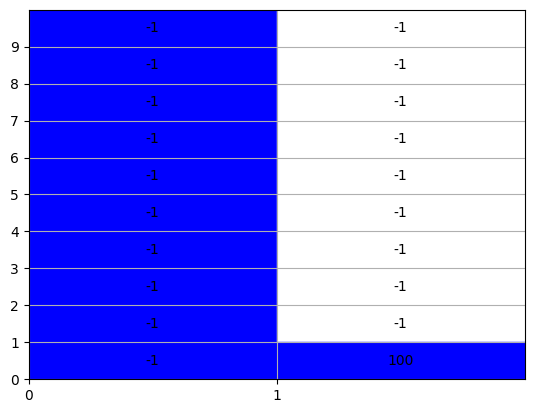

In [217]:
#display shortest path
shortest_path = get_shortest_path(0, 0) 

#plot
fig, ax = plt.subplots()

color_dict = {-1: 'white', -100: 'black', 100: 'green'}

for i in range(rows):
    for j in range(columns):
        reward_value = rewards[i, j]
        color = color_dict.get(reward_value, 'grey')

        # Check if the current cell is in the shortest path
        if [i, j] in shortest_path:
            color = 'blue'  # Override the color if the cell is part of the shortest path

        rect = plt.Rectangle((j, rows - i - 1), 1, 1, color=color)
        ax.add_patch(rect)
        text = ax.text(j + 0.5, rows - i - 0.5, int(reward_value), ha="center", va="center", color="black")

ax.set_xlim(0, columns)
ax.set_ylim(0, rows)
ax.set_xticks(np.arange(0, columns, 1))
ax.set_yticks(np.arange(0, rows, 1))
ax.grid(which='both')

plt.show()